In [ ]:
!pip install torch-xla -f https://storage.googleapis.com/tpu-pytorch/wheels/tpuvm/torch_xla-1.12-cp37-cp37m-linux_x86_64.whl

Looking in links: https://storage.googleapis.com/tpu-pytorch/wheels/tpuvm/torch_xla-1.12-cp37-cp37m-linux_x86_64.whlCollecting torch-xla  Downloading torch_xla-2.5.1-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (17 kB)Requirement already satisfied: absl-py>=1.0.0 in /opt/conda/lib/python3.10/site-packages (from torch-xla) (1.4.0)Requirement already satisfied: numpy in /opt/conda/lib/python3.10/site-packages (from torch-xla) (1.26.4)Requirement already satisfied: pyyaml in /opt/conda/lib/python3.10/site-packages (from torch-xla) (6.0.2)Requirement already satisfied: requests in /opt/conda/lib/python3.10/site-packages (from torch-xla) (2.32.3)Requirement already satisfied: charset-normalizer<4,>=2 in /opt/conda/lib/python3.10/site-packages (from requests->torch-xla) (3.3.2)Requirement already satisfied: idna<4,>=2.5 in /opt/conda/lib/python3.10/site-packages (from requests->torch-xla) (3.7)Requirement already satisfied: urllib3<3,>=1.21.1 in /opt/conda/lib/python3.10/site-packages (fro

In [2]:
!pip install torch transformers pandas scikit-learn

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive

In [4]:
import pandas as pd

In [ ]:
sinhala_fake1 = pd.read_csv('/content/drive/MyDrive/sinhala/sinhala_fake.csv')
sinhala_fake2 = pd.read_excel('/content/drive/MyDrive/sinhala/sinhala_fake_2.xlsx')
sinhala_real = pd.read_excel('/content/drive/MyDrive/sinhala/sinhala_real.xlsx')

In [ ]:
sinhala_fake = pd.concat([sinhala_fake1.drop('title', axis=1), sinhala_fake2.rename(columns={'title_sinhala': 'text'})], axis=0).reset_index(drop=True)

In [ ]:
sinhala_real.drop(['id','news_url','title'], axis=1, inplace=True)
sinhala_real.rename(columns={'title_sinhala': 'text'}, inplace=True)

In [ ]:
sinhala_fake['label'] = 1
sinhala_real['label'] = 0

In [ ]:
sinhala_news_df = pd.concat([sinhala_fake, sinhala_real], axis=0).reset_index(drop=True)

In [ ]:
sinhala_news_df.head(5)

,text,label
0,Miley Cyrus සහ Liam Hemsworth රහසේ විවාහ වුණාද?,1
1,පැරිස් ජැක්සන් සහ කාරා ඩෙලිවින්ග්න් ගැලපෙන ඇඳු...,1
2,ඩොනල්ඩ් ට්‍රම්ප්ට විරෝධය පළ කරමින් ප්‍රසිද්ධ ප...,1
3,සින්ඩි ක්‍රෝෆර්ඩ්ගේ දියණිය Kaia Gerber හැරී ස්...,1
4,2018 ඔස්කාර් නාමයෝජනා සම්පූර්ණ ලැයිස්තුව - විව...,1


In [ ]:
# Assuming your dataset is in a DataFrame named 'train_data' and the label column is named 'label'
label_counts = sinhala_news_df['label'].value_counts()
print("Class distribution in training data:")
print(label_counts)

Class distribution in training data:label0    59991    5331Name: count, dtype: int64

In [ ]:
import pandas as pd
import re

# Define the cleaning function
def clean_text(text):
    if not isinstance(text, str):  # Check if the value is not a string
        return ""
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"[^අ-෴a-zA-Z\s]", "", text)  # Keep Sinhala and English letters
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    return text

# Apply the cleaning function safely
sinhala_news_df['text'] = sinhala_news_df['text'].fillna("").apply(clean_text)

In [ ]:
sinhala_news_df.head(5)

,text,label
0,Miley Cyrus සහ Liam Hemsworth රහසේ විවාහ වුණාද,1
1,පැරිස් ජැක්සන් සහ කාරා ඩෙලිවින්ග්න් ගැලපෙන ඇඳු...,1
2,ඩොනල්ඩ් ට්රම්ප්ට විරෝධය පළ කරමින් ප්රසිද්ධ පුද...,1
3,සින්ඩි ක්රෝෆර්ඩ්ගේ දියණිය Kaia Gerber හැරී ස්ට...,1
4,ඔස්කාර් නාමයෝජනා සම්පූර්ණ ලැයිස්තුව විවිධත්වය,1


In [ ]:
sinhala_news_df.shape

(11330, 2)

In [ ]:
from transformers import AutoTokenizer, AutoModelForMaskedLM

# Load SinBERT-large
tokenizer = AutoTokenizer.from_pretrained("NLPC-UOM/SinBERT-large")
model = AutoModelForMaskedLM.from_pretrained("NLPC-UOM/SinBERT-large")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: The secret `HF_TOKEN` does not exist in your Colab secrets.To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.You will be able to reuse this secret in all of your notebooks.Please note that authentication is recommended but still optional to access public models or datasets.  warnings.warn(

config.json:   0%|          | 0.00/722 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.50M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.15M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/504M [00:00<?, ?B/s]

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(
    "NLPC-UOM/SinBERT-large",
    num_labels=2  # Binary classification (FAKE, REAL)
)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at NLPC-UOM/SinBERT-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

In [ ]:
from sklearn.model_selection import train_test_split

train_texts, val_texts, train_labels, val_labels = train_test_split(
    sinhala_news_df['text'], sinhala_news_df['label'], test_size=0.2, random_state=42
)

In [ ]:
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=512, return_tensors="pt")
val_encodings = tokenizer(list(val_texts), truncation=True, padding=True, max_length=512, return_tensors="pt")

In [ ]:
import torch

class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {
            "input_ids": self.encodings["input_ids"][idx],
            "attention_mask": self.encodings["attention_mask"][idx],
            "labels": torch.tensor(self.labels[idx], dtype=torch.long)
        }

# Create datasets
train_dataset = NewsDataset(train_encodings, train_labels.tolist())
val_dataset = NewsDataset(val_encodings, val_labels.tolist())

In [ ]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    save_strategy="epoch",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead  warnings.warn(wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)wandb: You can find your API key in your browser here: https://wandb.ai/authorizewandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc

Epoch,Training Loss,Validation Loss
1,0.606000,0.542932
2,0.483300,0.545263
3,0.412600,0.557315


TrainOutput(global_step=1701, training_loss=0.4868096380216945, metrics={'train_runtime': 2655.3087, 'train_samples_per_second': 10.241, 'train_steps_per_second': 0.641, 'total_flos': 7154515817349120.0, 'train_loss': 0.4868096380216945, 'epoch': 3.0})

In [ ]:
preds = trainer.predict(val_dataset)
predicted_labels = torch.argmax(torch.tensor(preds.predictions), axis=1)

from sklearn.metrics import classification_report

print(classification_report(val_labels, predicted_labels, target_names=["FAKE", "REAL"]))

              precision    recall  f1-score   support        FAKE       0.76      0.74      0.75      1172        REAL       0.73      0.75      0.74      1094    accuracy                           0.75      2266   macro avg       0.75      0.75      0.75      2266weighted avg       0.75      0.75      0.75      2266

In [ ]:
model.save_pretrained("/content/drive/MyDrive/sinhala/sinhala_fake_news_model")
tokenizer.save_pretrained("/content/drive/MyDrive/sinhala/sinhala_fake_news_tokenizer")

('/content/drive/MyDrive/sinhala/sinhala_fake_news_tokenizer/tokenizer_config.json', '/content/drive/MyDrive/sinhala/sinhala_fake_news_tokenizer/special_tokens_map.json', '/content/drive/MyDrive/sinhala/sinhala_fake_news_tokenizer/vocab.json', '/content/drive/MyDrive/sinhala/sinhala_fake_news_tokenizer/merges.txt', '/content/drive/MyDrive/sinhala/sinhala_fake_news_tokenizer/added_tokens.json', '/content/drive/MyDrive/sinhala/sinhala_fake_news_tokenizer/tokenizer.json')

In [ ]:
# test

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load the model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("/content/drive/MyDrive/sinhala/sinhala_fake_news_tokenizer")
model = AutoModelForSequenceClassification.from_pretrained("/content/drive/MyDrive/sinhala/sinhala_fake_news_model")

# Check if GPU is available and set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Example input text
text = "එලිසා දුෂ්කු පවසන්නේ “සත්‍ය බොරු” ස්ටන්ට් සම්බන්ධීකාරක ඇයට වයස අවුරුදු 12 දී ලිංගික අතවර කළ බවයි"

# Tokenize and move inputs to the correct device
inputs = tokenizer(
    text,
    truncation=True,
    padding=True,
    max_length=512,
    return_tensors="pt"
)
inputs = {key: val.to(device) for key, val in inputs.items()}

# Perform inference
model.eval()
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits

# Convert logits to probabilities and predict
probabilities = torch.softmax(logits, dim=-1)
predicted_label = torch.argmax(probabilities, dim=1).item()

# Map predictions to labels
label_map = {1: "FAKE", 0: "REAL"}
print(f"Prediction: {label_map[predicted_label]}")

Prediction: REAL

In [3]:
#fine tuning model
import pandas as pd

In [4]:
sinhala_fake = pd.read_excel('/kaggle/input/sindataset/sinhala final/Sinhala Fake.xlsx')
sinhala_real = pd.read_excel('/kaggle/input/sindataset/sinhala final/Sinhala Real.xlsx')

In [5]:
sinhala_fake['label'] = 1
sinhala_real['label'] = 0

In [6]:
sinhala_news_df_new = pd.concat([sinhala_fake, sinhala_real], axis=0).reset_index(drop=True)

In [7]:
sinhala_news_df_new.drop(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'], axis=1, inplace=True)

In [8]:
sinhala_news_df_new.head()

,text,label
0,ශ්‍රී ලංකාවේ 48 වන අගවිනිසුරු ලෙස ජනාධිපති අනු...,1
1,පසුගිය දා අවසන් වූ 5 ශ්‍රේණිය ශිෂ්‍යත්ව විභාගය...,1
2,පාස්කු ඉරුදින ත්‍රස්ත ප්‍රහාර මාලාවෙන් වින්දිත...,1
3,දළ වශයෙන් සෑම දින 29කට වරක් පූර්ණ සඳක් ඇති වන්...,1
4,"බදුල්ල, දුන්හිඳ ප්‍රදේශයේදී බස් රථයක් පෙරළීමෙන...",1


In [9]:
sinhala_news_df_new.shape

(1000, 2)

In [10]:
# Assuming your dataset is in a DataFrame named 'train_data' and the label column is named 'label'
label_counts = sinhala_news_df_new['label'].value_counts()
print("Class distribution in training data:")
print(label_counts)

Class distribution in training data:
label
1    500
0    500
Name: count, dtype: int64


In [12]:
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("/kaggle/input/fakemodels/sinhala_fake_news_tokenizer3/sinhala_fake_news_tokenizer3")
model = AutoModelForMaskedLM.from_pretrained("/kaggle/input/fakemodels/sinhala_fake_news_model3/sinhala_fake_news_model3")

In [13]:
from sklearn.model_selection import train_test_split

train_texts, val_texts, train_labels, val_labels = train_test_split(
    sinhala_news_df_new['text '], sinhala_news_df_new['label'], test_size=0.1, random_state=42
)

In [14]:
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=512, return_tensors="pt")
val_encodings = tokenizer(list(val_texts), truncation=True, padding=True, max_length=512, return_tensors="pt")

In [15]:
import torch

class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {
            "input_ids": self.encodings["input_ids"][idx],
            "attention_mask": self.encodings["attention_mask"][idx],
            # The labels should be repeated for each token in the sequence
            "labels": torch.tensor([self.labels[idx]] * self.encodings["input_ids"][idx].shape[0], dtype=torch.long)
        }
        # Remove the squeeze operation as we need the labels to have sequence length
        # item['labels'] = item['labels'].squeeze()
        return item

# Create datasets
train_dataset = NewsDataset(train_encodings, train_labels.tolist())
val_dataset = NewsDataset(val_encodings, val_labels.tolist())

In [22]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=1,  # Further reduced eval batch size
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    save_strategy="epoch",
    gradient_checkpointing=True,
    gradient_accumulation_steps=2  # Accumulate gradients over 2 steps
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

trainer.train()

/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torch/utils/checkpoint.py:295: FutureWarning: `torch.cpu.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cpu', args...)` instead.
  with torch.enable_grad(), device_autocast_ctx, torch.cpu.amp.autocast(**ctx.cpu_autocast_kwargs):  # type: ignore[attr-defined]


Epoch,Training Loss,Validation Loss
0,No log,0.461047
2,No log,0.319362


/opt/conda/lib/python3.10/site-packages/torch/utils/checkpoint.py:295: FutureWarning: `torch.cpu.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cpu', args...)` instead.
  with torch.enable_grad(), device_autocast_ctx, torch.cpu.amp.autocast(**ctx.cpu_autocast_kwargs):  # type: ignore[attr-defined]
/opt/conda/lib/python3.10/site-packages/torch/utils/checkpoint.py:295: FutureWarning: `torch.cpu.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cpu', args...)` instead.
  with torch.enable_grad(), device_autocast_ctx, torch.cpu.amp.autocast(**ctx.cpu_autocast_kwargs):  # type: ignore[attr-defined]


TrainOutput(global_step=168, training_loss=0.03303296225411551, metrics={'train_runtime': 260.7015, 'train_samples_per_second': 10.357, 'train_steps_per_second': 0.644, 'total_flos': 705565725818880.0, 'train_loss': 0.03303296225411551, 'epoch': 2.9734513274336285})

In [21]:
preds = trainer.predict(val_dataset)
predicted_labels = torch.argmax(torch.tensor(preds.predictions), axis=1)

from sklearn.metrics import classification_report

print(classification_report(val_labels, predicted_labels, target_names=["FAKE", "REAL"]))

OutOfMemoryError: CUDA out of memory. Tried to allocate 4.04 GiB. GPU 0 has a total capacity of 15.89 GiB of which 3.92 GiB is free. Process 5695 has 11.97 GiB memory in use. Of the allocated memory 8.66 GiB is allocated by PyTorch, and 3.02 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [88]:
# model.save_pretrained("/content/drive/MyDrive/sinhala/sinhala_fake_news_model2")
# tokenizer.save_pretrained("/content/drive/MyDrive/sinhala/sinhala_fake_news_tokenizer2")

('/content/drive/MyDrive/sinhala/sinhala_fake_news_tokenizer2/tokenizer_config.json', '/content/drive/MyDrive/sinhala/sinhala_fake_news_tokenizer2/special_tokens_map.json', '/content/drive/MyDrive/sinhala/sinhala_fake_news_tokenizer2/vocab.json', '/content/drive/MyDrive/sinhala/sinhala_fake_news_tokenizer2/merges.txt', '/content/drive/MyDrive/sinhala/sinhala_fake_news_tokenizer2/added_tokens.json', '/content/drive/MyDrive/sinhala/sinhala_fake_news_tokenizer2/tokenizer.json')

In [30]:
import pandas as pd
# Load dataset
political_bias_fake_df = pd.read_excel('/kaggle/input/politicalbiasdataset/Political Fake.xlsx')  # Ensure columns: 'text', 'label_fake', 'label_bias'
political_bias_real_df = pd.read_excel('/kaggle/input/politicalbiasdataset/Political Real.xlsx')  # Ensure columns: 'text', 'label_fake', 'label_bias'

In [31]:
political_bias_df = pd.concat([political_bias_fake_df, political_bias_real_df], axis=0).reset_index(drop=True)

In [34]:
political_bias_df.head(5)

,text,label_fake,label_bias
0,ශ්‍රී ලංකාවේ ඉන්දීය මහ කොමසාරිස් කාර්යාලය රාජප...,1,1
1,ශ්‍රී ලාංකිකයන්ට වීසා බලපත්‍ර නොමැතිව ඇමරිකාවට...,1,1
2,2016 වසරේ ඇමරිකානු ජනාධිපතිවරණයට ශ්‍රී ලාංකික ...,1,1
3,"මට සංවිධානාත්මකව මඩ ගහනවා. මාව කොටියෙක් කරලා, ...",1,1
4,මුදල් අච්චු ගැසීම සැබවින්ම මෙරට දේශපාලනයේ ආන්ද...,1,1


In [40]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset
from torch.nn import BCEWithLogitsLoss

# Split dataset
train_texts, val_texts, train_labels, val_labels = train_test_split(
    political_bias_df['text'].tolist(),
    political_bias_df[['label_fake', 'label_bias']].values.tolist(),  # Multi-label: [fake_label, bias_label]
    test_size=0.2,
    random_state=42
)

# Tokenization
tokenizer = AutoTokenizer.from_pretrained("/kaggle/input/fakemodels/sinhala_fake_news_tokenizer3/sinhala_fake_news_tokenizer3")

class NewsDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = torch.tensor(labels, dtype=torch.float)  # Use float for multi-label classification

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

# Create datasets
train_dataset = NewsDataset(train_texts, train_labels)
val_dataset = NewsDataset(val_texts, val_labels)

# Load model for multi-label classification
model = AutoModelForSequenceClassification.from_pretrained(
    "/kaggle/input/fakemodels/sinhala_fake_news_model3/sinhala_fake_news_model3", 
    num_labels=2  # Two labels: fake/real and bias/unbiased
)

# Custom Trainer class with custom loss function
class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")  # Extract labels from inputs
        outputs = model(**inputs)      # Forward pass
        logits = outputs.logits        # Extract logits
        loss_fct = BCEWithLogitsLoss() # Binary Cross-Entropy Loss for multi-label classification
        loss = loss_fct(logits, labels)  # Compute loss
        return (loss, outputs) if return_outputs else loss

# Training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    save_strategy="epoch",
    logging_steps=10,
    load_best_model_at_end=True
)

# Custom Trainer instance
trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

# Start training
trainer.train()


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at /kaggle/input/fakemodels/sinhala_fake_news_model3/sinhala_fake_news_model3 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.521100,0.440777
2,0.439800,0.340481
3,0.381600,0.343396


TrainOutput(global_step=60, training_loss=0.45927457014719647, metrics={'train_runtime': 42.1319, 'train_samples_per_second': 11.393, 'train_steps_per_second': 1.424, 'total_flos': 126293306572800.0, 'train_loss': 0.45927457014719647, 'epoch': 3.0})

In [72]:
model.save_pretrained("/kaggle/working/sinhala_fake_news_model4")
tokenizer.save_pretrained("/kaggle/working/sinhala_fake_news_tokenizer4")

('/kaggle/working/sinhala_fake_news_tokenizer4/tokenizer_config.json',
 '/kaggle/working/sinhala_fake_news_tokenizer4/special_tokens_map.json',
 '/kaggle/working/sinhala_fake_news_tokenizer4/vocab.json',
 '/kaggle/working/sinhala_fake_news_tokenizer4/merges.txt',
 '/kaggle/working/sinhala_fake_news_tokenizer4/added_tokens.json',
 '/kaggle/working/sinhala_fake_news_tokenizer4/tokenizer.json')

In [73]:
import shutil

# Zip the model and tokenizer directories
shutil.make_archive("/kaggle/working/sinhala_fake_news_model4", 'zip', "./sinhala_fake_news_model4")
shutil.make_archive("/kaggle/working/sinhala_fake_news_tokenizer4", 'zip', "./sinhala_fake_news_tokenizer4")

print("Model and tokenizer have been zipped.")

Model and tokenizer have been zipped.


In [74]:
from IPython.display import FileLink
FileLink(r'sinhala_fake_news_model4.zip')

/kaggle/working/sinhala_fake_news_model4.zip

Tokens: ['à·ģ', 'à·ĬâĢį', 'à¶»', 'à·ĵ', 'Ġà¶½', 'à¶Ĥ', 'à¶ļ', 'à·ı', 'à·Ģ', 'à·ļ', 'Ġ48', 'Ġà·Ģà¶±', 'Ġà¶ħà¶ľà·Ģ', 'à·Ĵ', 'à¶±', 'à·Ĵ', 'à·ĥ', 'à·Ķ', 'à¶»', 'à·Ķ', 'Ġà¶½', 'à·Ļ', 'à·ĥ', 'Ġà¶¢à¶±', 'à·ı', 'à¶°', 'à·Ĵ', 'à¶´à¶Ń', 'à·Ĵ', 'Ġà¶ħà¶±', 'à·Ķ', 'à¶»', 'Ġà¶ļ', 'à·Ķ', 'à¶¸', 'à·ı', 'à¶»', 'Ġà¶¯', 'à·Ĵ', 'à·ĥ', 'à·ı', 'à¶±', 'à·ı', 'à¶ºà¶ļ', 'Ġà·Ģ', 'à·Ĵ', 'à·ĥ', 'à·Ĵ', 'à¶±', 'à·Ĭ', 'Ġà·ģ', 'à·ĬâĢį', 'à¶»', 'à·ļ', 'à·Ĥ', 'à·Ĭ', 'à¶¨', 'à·ı', 'à¶°', 'à·Ĵ', 'à¶ļà¶»à¶«', 'Ġà·Ģ', 'à·Ĵ', 'à¶±', 'à·Ĵ', 'à·ĥ', 'à·Ķ', 'à¶»', 'à·Ķ', 'Ġà¶¸', 'à·Ķ', 'à¶»', 'à·Ĭ', 'à¶¯', 'à·Ķ', 'Ġà¶±', 'à·Ĵ', 'à¶»', 'à·ĸ', 'à¶´', 'à·ı', 'Ġà¶¶', 'à·Ĵ', 'à¶³', 'à·Ķ', 'à·Ĥ', 'à·Ĵ', 'à¶«', 'à·ĵ', 'Ġà¶´', 'à·ĬâĢį', 'à¶»à¶±', 'à·ı', 'à¶±', 'à·Ĭ', 'à¶¯', 'à·Ķ', 'Ġà¶´à¶Ń', 'à·Ĭ', 'Ġà¶ļà¶»à¶±', 'à·Ķ', 'Ġà¶½', 'à·Ĳ', 'à¶¶', 'Ġà¶Ń', 'à·Ĵ', 'à¶¶', 'à·ļ.']
Decoded Text: <s>ශ්‍රී ලංකාවේ 48 වන අගවිනිසුරු ලෙස ජනාධිපති අනුර කුමාර දිසානායක විසින් ශ්‍රේෂ්ඨාධිකරණ විනිසුරු මුර්දු නිරූපා බිඳුෂිණී ප්‍රනාන්දු පත් කරනු ලැබ තිබේ.</s>

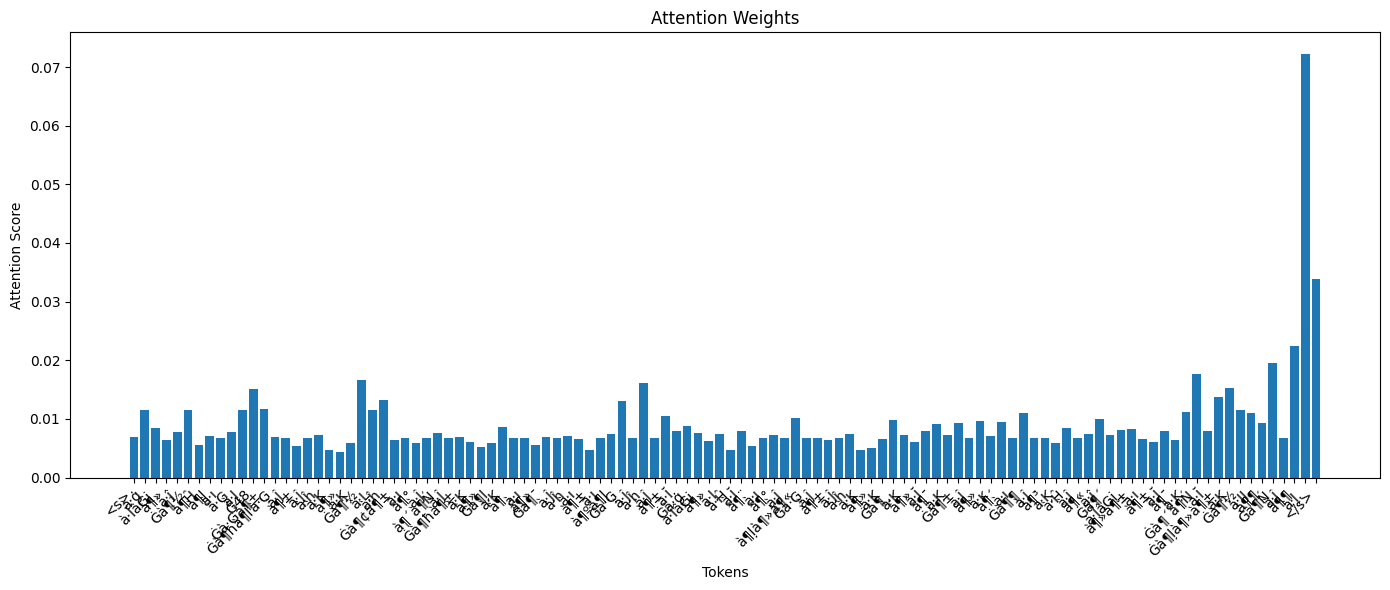

In [70]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch
import matplotlib.pyplot as plt
import numpy as np

# Use a Sinhala-specific tokenizer
tokenizer = AutoTokenizer.from_pretrained("NLPC-UOM/SinBERT-large")
# model = AutoModelForSequenceClassification.from_pretrained("path_to_your_trained_model", output_attentions=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)  # Move model to the device
model.eval()

# Example Sinhala text
text = "ශ්‍රී ලංකාවේ 48 වන අගවිනිසුරු ලෙස ජනාධිපති අනුර කුමාර දිසානායක විසින් ශ්‍රේෂ්ඨාධිකරණ විනිසුරු මුර්දු නිරූපා බිඳුෂිණී ප්‍රනාන්දු පත් කරනු ලැබ තිබේ."

tokens = tokenizer.tokenize(text)
# Decode the tokens back to the original text
decoded_text = tokenizer.decode(tokenizer.encode(text))

print(f"Tokens: {tokens}")
print(f"Decoded Text: {decoded_text}")

# Tokenize the input text
inputs = tokenizer(text, return_tensors="pt").to(device)

with torch.no_grad():
    outputs = model(**inputs, output_attentions=True)

# Extract attention weights
attentions = outputs.attentions  # Attention layers
last_layer_attention = attentions[-1][0]  # Last layer's attention for the first input

# Map attention scores to words
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
print(tokens)  # Check if the tokens are now correctly aligned with Sinhala

attention_scores = last_layer_attention.mean(dim=0)  # Average attention across heads

# Process the attention scores for visualization
scores = attention_scores.cpu().numpy()
scores = scores.mean(axis=0)[:len(tokens)]  # Aggregate across attention heads if needed

# Plot attention scores
plt.figure(figsize=(14, 6))
plt.bar(range(len(scores)), scores, tick_label=tokens)
plt.xticks(rotation=45, ha='right')  # Rotate and align labels
plt.title("Attention Weights")
plt.xlabel("Tokens")
plt.ylabel("Attention Score")
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


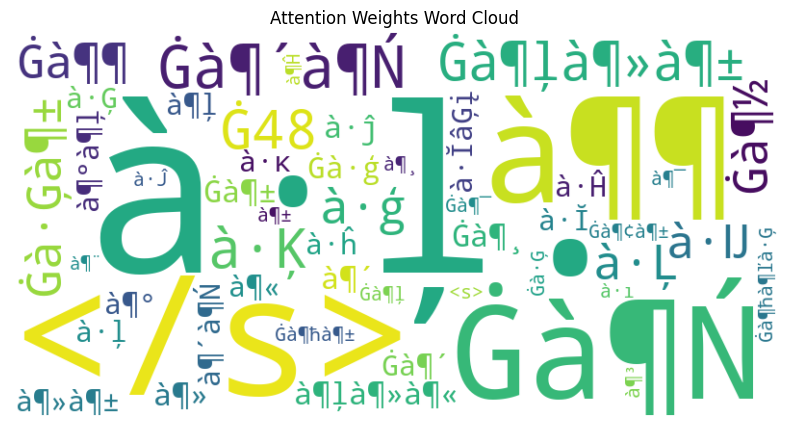

In [71]:
from wordcloud import WordCloud
token_scores = dict(zip(tokens, scores))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(token_scores)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Attention Weights Word Cloud")
plt.show()
